In [11]:
import os
import pandas as pd

# Use current working directory (Jupyter-friendly)
current_folder = os.getcwd()  # folder where notebook is running
csv_files = [f for f in os.listdir(current_folder)
             if f.lower().startswith("customer_segmentation_data") and f.lower().endswith(".csv")]

if not csv_files:
    raise FileNotFoundError("No CSV file starting with 'customer_segmentation_data' found in the folder.")

file_path = csv_files[0]  # just the file name
df = pd.read_csv(file_path)
print("✅ Dataset Loaded Successfully\n")


✅ Dataset Loaded Successfully



✅ Dataset Loaded Successfully

   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  

Data shape after cleaning: (1000, 9)

Descriptive Statistics:
                id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   

C:\Users\shivam kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\shivam kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\shivam kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\shivam kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to 

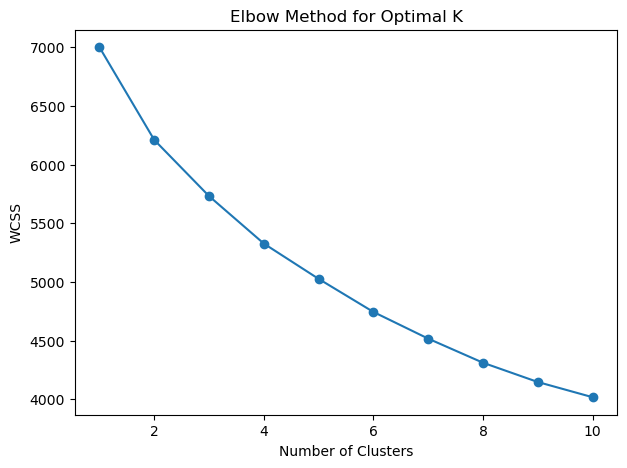

C:\Users\shivam kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(



Cluster Counts:
Cluster
0    355
1    329
2    316
Name: count, dtype: int64


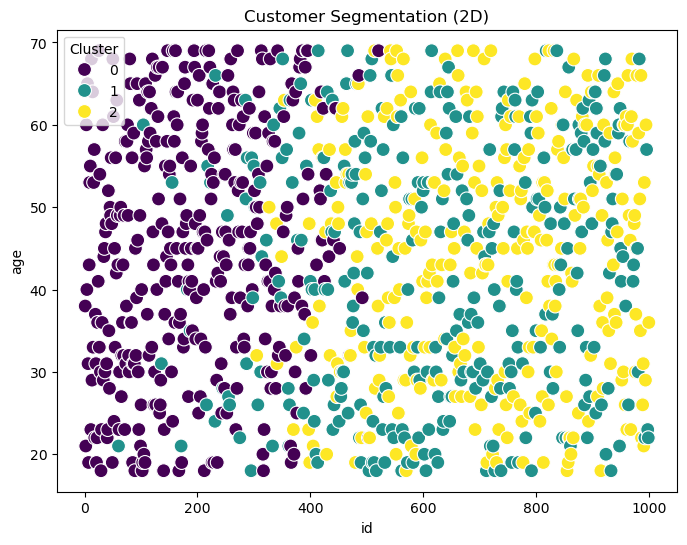

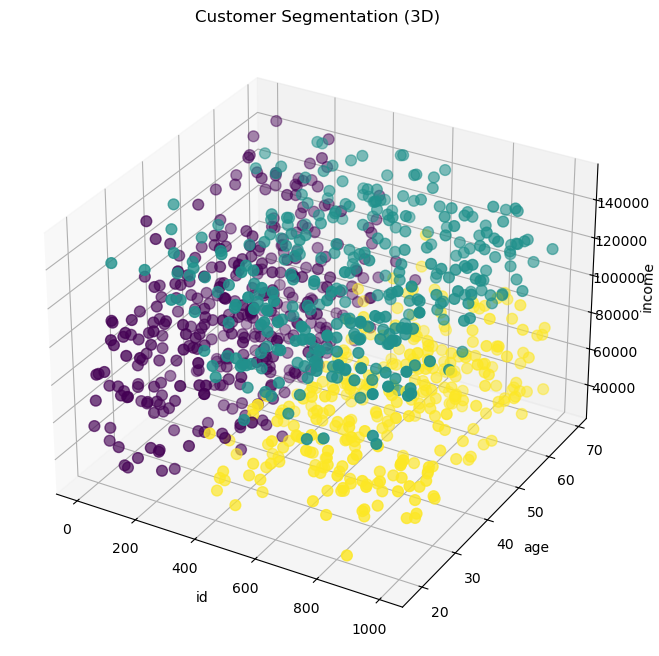


Cluster Summary:
                 id        age         income  spending_score  \
Cluster                                                         
0        195.814085  45.056338   81748.174648       54.101408   
1        624.279635  42.045593  123239.340426       47.948328   
2        713.917722  44.161392   59919.161392       49.696203   

         membership_years  purchase_frequency  last_purchase_amount  
Cluster                                                              
0                5.664789           27.416901            487.708282  
1                4.896657           26.428571            433.817143  
2                5.844937           25.848101            558.501234  

Insights & Recommendations:

Cluster 0: High-value customers – frequent purchases, high spending.
Cluster 1: Average customers – moderate purchasing behavior.
Cluster 2: Low-value customers – low spending, infrequent purchases.

Recommendations:
- Loyalty programs for high-value customers
- Personalized 

In [13]:
# Customer Segmentation Project
# 1. Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# 2. Automatically find the CSV in the same folder
csv_files = [f for f in os.listdir('.')  # current folder
             if f.lower().startswith("customer_segmentation_data") and f.lower().endswith(".csv")]

if not csv_files:
    raise FileNotFoundError(
        "No CSV file starting with 'customer_segmentation_data' found in this folder."
    )

# Load the first matching CSV file
df = pd.read_csv(csv_files[0])
print("✅ Dataset Loaded Successfully\n")
print(df.head())

# 3. Data Cleaning
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
print("\nData shape after cleaning:", df.shape)

# 4. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())
print("\nAverage Values:")
print(df.mean(numeric_only=True))

# 5. Feature Selection & Scaling
features = df.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 6. Elbow Method to find optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# 7. Apply K-Means
optimal_k = 3  # can adjust based on elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print("\nCluster Counts:")
print(df['Cluster'].value_counts())

# 8. 2D Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=features.iloc[:,0],
    y=features.iloc[:,1],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer Segmentation (2D)")
plt.xlabel(features.columns[0])
plt.ylabel(features.columns[1])
plt.legend(title="Cluster")
plt.show()

# 9. Optional 3D Visualization
if features.shape[1] >= 3:
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(
        features.iloc[:,0],
        features.iloc[:,1],
        features.iloc[:,2],
        c=df['Cluster'],
        cmap='viridis',
        s=60
    )
    ax.set_xlabel(features.columns[0])
    ax.set_ylabel(features.columns[1])
    ax.set_zlabel(features.columns[2])
    ax.set_title("Customer Segmentation (3D)")
    plt.show()

# 10. Cluster Summary & Insights
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\nCluster Summary:")
print(cluster_summary)

print("\nInsights & Recommendations:")
print("""
Cluster 0: High-value customers – frequent purchases, high spending.
Cluster 1: Average customers – moderate purchasing behavior.
Cluster 2: Low-value customers – low spending, infrequent purchases.

Recommendations:
- Loyalty programs for high-value customers
- Personalized offers for average customers
- Re-engagement campaigns for low-value customers
""")
